# Block 33: Career Simulation

## Employee Turnover Analytics


### Project Statement:

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employees’ satisfaction in the workplace. The data could be used to identify patterns in workstyle and their interest in continuing to work for the company.

The HR department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain period of time.

As the ML developer assigned to the HR department, you have been asked to create ML programs to

- Perform a data quality check by checking for missing values.

- Understand what factors contributed most to employee turnover by EDA.

- Perform a clustering of employees who left based on their satisfaction and evaluation.

- Handle the left-class imbalance using the SMOTE technique.

- Perform k-fold cross-validation model training and evaluate performance.

- Identify the best model and justify the evaluation metrics used.

- Suggest various retention strategies for targeted employees.


### Data will be modified from:

https://www.kaggle.com/liujiaqi/hr-comma-sepcsv
![SCR-20241125-sjmi.png](attachment:SCR-20241125-sjmi.png)


### Perform the following steps:

- Perform a data quality check by checking for missing values if any.

- Understand what factors contributed most to employee turnover by EDA.

  - Draw a heatmap of the correlation matrix between all numerical features/columns in the data.

  - Draw the distribution plot of

    - Employee satisfaction (use column satisfaction_level)

    - Employee evaluation (use column last_evaluation)

    - Employee average monthly hours (use column average_montly_hours)

  - Draw the bar plot of the employee project count of both employees who left and who stayed in the organization (use column number_project and hue column turnover) and give your inferences from the plot.

- Perform a clustering of employees who left based on their satisfaction and evaluation.

  - Choose columns satisfaction_level, last_evaluation, and turnover.

  - K-means clustering of employees who left the company into 3 clusters.

  - Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

- Handle the left-class imbalance using the SMOTE technique.

  - Pre-process the data by converting categorical columns to numerical columns by:

    - Separating categorical variables and numeric variables

    - Applying get_dummies() to the categorical variables

    - Combining categorical variables and numeric variables

  - Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

  - Upsample the training dataset using the SMOTE technique from the `imblearn` module.

- Perform 5-fold cross-validation model training and evaluate performance.

  - Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

  - Train a random forest classifier model, apply the 5-fold CV, and plot the classification report.

  - Train a gradient boosting classifier model, apply the 5-fold CV, and plot the classification report.

- Identify the best model and justify the evaluation metrics used.

  - Find the ROC/AUC for each model and plot the ROC curve.

  - Find the confusion matrix for each of the models.

  - Explain which metric needs to be used: Recall or Precision?

- Suggest various retention strategies for targeted employees.

  - Using the best model, predict the probability of employee turnover in the test data.

  - Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

- Safe Zone (Green) (Score <= 20%)

- Low Risk Zone (Yellow) (20% < Score <= 60%)

- Medium Risk Zone (Orange) (60% < Score < 90%)

- High Risk Zone (Red) (Score => 90%).


### We'll be covering:

- Descriptive Analytics: What happened?
- Predictive Analytics: What Might Happen?
- Prescriptive Analytics: What Should We Do?

---

### Objective:

To understand what factors contributed most to employee turnover.

To perform clustering of employees who left based on their satisfaction and evaluation

To create a model that predicts the likelihood that a certain employee will leave the company or not.

To create or improve different retention strategies for targeted employees.


In [1]:
#
## LOG:
# This last submission is when I added stratify to the train_test_split().

<a id='dataset'></a>

#### Reading the Data

---


In [2]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import plotly.express as px

In [3]:
# Load the dataset
# // TODO: Complete this section
df = pd.read_csv("./HR_comma_sep.csv")

In [4]:
# Examine the dataset
# // TODO: Complete this section
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Rename Columns
# Renaming certain columns for better readability
df = df.rename(
    columns={
        "satisfaction_level": "satisfaction",
        "last_evaluation": "evaluation",
        "number_project": "projectCount",
        "average_montly_hours": "averageMonthlyHours",
        "time_spend_company": "yearsAtCompany",
        "Work_accident": "workAccident",
        "promotion_last_5years": "promotion",
        "sales": "department",
        "left": "turnover",
    }
)

In [7]:
# Print the first few rows
df.head(3)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [8]:
# Check class (turnover) distribution
# // TODO: Complete this section
df["turnover"].value_counts()

turnover
0    11428
1     3571
Name: count, dtype: int64

Text(0, 0.5, 'Count')

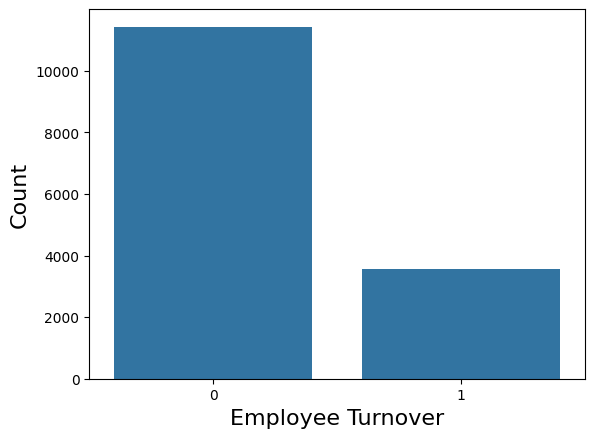

In [9]:
# Plot barplot of class distribution
# // TODO: Complete this section
plt.figure()
sns.barplot(
    x=df["turnover"].value_counts().index, y=df["turnover"].value_counts().values
)
plt.xlabel("Employee Turnover", fontsize=16)
plt.ylabel("Count", fontsize=16)

<a id='datacleaning'></a>

##### 1. Perform data quality check by checking for missing values if any

---


In [10]:
# Can you check to see if there are any missing values in our data set?
# // TODO: Complete this section

df.isna().sum()

satisfaction           0
evaluation             0
projectCount           0
averageMonthlyHours    0
yearsAtCompany         0
workAccident           0
turnover               0
promotion              0
department             0
salary                 0
dtype: int64

There is no missing data.


In [11]:
# Check the datatype of our features. Are there any data inconsistencies?
# // Complete this section

df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

Satisfaction and evaluation or floats while everything else except two are integers. Department and salary are object objects/strings.


<a id='descriptive_statistics'></a>

##### 2. Understand what factors contributed most to employee turnover by EDA

---


In [12]:
# Display the statistical overview of the employees
# // TODO: Complete this section

# * I transposed the description because it actually looks better to me.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
projectCount,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
averageMonthlyHours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
yearsAtCompany,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
workAccident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
turnover,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [13]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?
# Group data by turnover, return turnover dataframe.
def compute_turnover_Summary():

    # Dropped department and salary columns because they are categorical and you cannot calculate mean or standard deviations from them
    return df.drop(["department", "salary"], axis=1).groupby("turnover")


# // TODO: Call function compute_turnover_Summary()
# Store turnover dataframe in variable called turnover_Summary

turnover_Summary = compute_turnover_Summary()
turnover_Summary

In [14]:
# Calculate mean of Turnover V.S. Non-turnover employees.
round(turnover_Summary.mean(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [15]:
# Calculate std of Turnover V.S. Non-turnover employees
round(turnover_Summary.std(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


My Observations from this, are people who do not leave the company are more satisfied than those who have left the company. Employees who stay with the company are more likely to have received a promotion compared to those who have left, who are less likely to have been promoted.


<a id='correlation_matrix'></a>

### Correlation Matrix


In [16]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
# // TODO: Complete this section

corr_matrix = df.corr(numeric_only=True)
corr_matrix

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [17]:
# Draw a heatmap of the correlation matrix between all numerical features/columns in the data.
# Add title, xticklabels and yticklabels
# // TODO: Complete this section

px.imshow(
    corr_matrix,
    text_auto=True,
    aspect=True,
    title="Correlation Matrix",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
)

It appears that a higher satisfaction rate the lower chance the employee would leave the company. It also appears that project count will increase the average monthly hours, but also the evaluation score they receive.


<a id='eda1'></a>

###### Distribution of Satisfaction, Evaluation, and Monthly Hours


**Task:** Draw the distribution plot of:

- Employee satisfaction
- Employee evaluation
- Employee average monthly hours


In [18]:
# // TODO: Complete this section
# Plot the distribution of Employee Satisfaction, Evaluation, and average monthly hours. What story can you tell?

# // TODO: Complete this section
# Set up the matplotlib (or plotly :) figure

satisfaction_distribution = df["satisfaction"].value_counts().sort_index()
evaluation_distribution = df["evaluation"].value_counts().sort_index()
averageMonthlyHours_distribution = df["averageMonthlyHours"].value_counts().sort_index()

# // TODO: Complete this section
# Graph Employee Satisfaction
satisfaction_fig = px.bar(
    x=satisfaction_distribution.index,
    y=satisfaction_distribution.values,
    labels={"x": "Satisfaction Score", "y": "Num of Employees"},
    title="Distribution of Employee Satisfaction",
)

# // TODO: Complete this section
# Graph Employee Evaluation

evaluation_fig = px.bar(
    x=evaluation_distribution.index,
    y=evaluation_distribution.values,
    labels={"x": "Evaluation Score", "y": "Num of Employees"},
    title="Distribution of Employee Evaluation",
)

# // TODO: Complete this section
# Graph Employee Average Monthly Hours

averageMonthlyHours_fig = px.bar(
    x=averageMonthlyHours_distribution.index,
    y=averageMonthlyHours_distribution.values,
    labels={"x": "Average Monthly Hours", "y": "Num of Employees"},
    title="Distribution of Employee Average Monthly Hours",
)


satisfaction_fig.show()
evaluation_fig.show()
averageMonthlyHours_fig.show()

- From our first plot, we can see that most of our employees are between .5 - 1.0. Although we do see a large spike of employees That have a .1 satisfaction rate. Very interesting.
- Our second plot does not give us a ton of insights into anything specific. Although it appears that our evaluators do not generally give below .45 scores.
- Our third plot shows that Most of the employees work on average between 125 - 275 hours monthly. There's also a little bulge of employees between 130 hours and 160 hours.


<a id='project_count'></a>

##### Bar plot of employee project count


**Task:**

- Draw the bar plot of the employee project count of both employees who left and who stayed in the organization (use column number_project and hue column turnover)
- Give your inferences from the plot


In [19]:
# // TODO: Complete this section
# Set up the matplotlib (or plotly :) figure


# // TODO: Complete this section
# Create bar plot of project count of both, employees who left and who stayed


fig = px.histogram(
    df,
    x="projectCount",
    color="turnover",
    barmode="group",
    title="Employee Project Count",
)

# // TODO: Complete this section
# Set xlabel and ylabel

fig.update_layout(xaxis_title="Number of Projects", yaxis_title="Number of Employees")


fig.show()

- More than half of the employees with **2, 6 and 7** projects left the company
- Majority of the employees who did not leave the company had **3,4, and 5** projects
- All of the employees with **7** projects left the company
- There is an increase in employee turnover rate as project count increases


<a id='clustering'></a>

##### 3. Perform clustering of Employees who left based on their satisfaction and evaluation

---


**Task:**

- Perform a clustering of employees who left based on their satisfaction and evaluation.
- Choose columns satisfaction_level, last_evaluation, and turnover.
- K-means clustering of employees who left the company into 3 clusters.
- Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


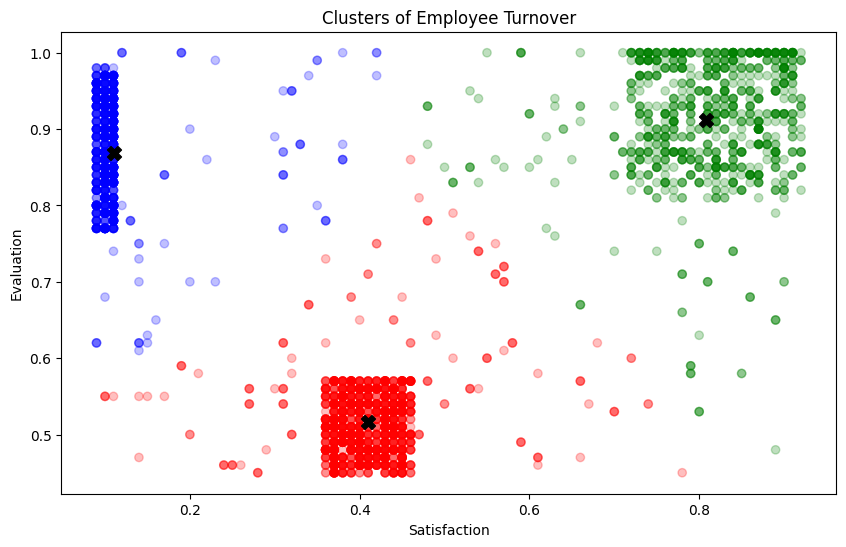

In [20]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover == 1][["satisfaction", "evaluation"]])

kmeans_colors = [
    # I believe green and red colors were switched, so I switched them. But if I have that in the wrong, let me know.
    "red" if c == 0 else "blue" if c == 2 else "green"
    for c in kmeans.labels_
]


fig = plt.figure(figsize=(10, 6))
plt.scatter(
    x="satisfaction",
    y="evaluation",
    data=df[df.turnover == 1],
    alpha=0.25,
    color=kmeans_colors,
)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    color="black",
    marker="X",
    s=100,
)
plt.title("Clusters of Employee Turnover")

plt.show()

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee

**Cluster 3 (Green):** Hard-working and Happy Employee


`There are 3 distinct clusters for employees who left the company`

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

- **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

- **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

- **Question:** Could this cluser mean that employees left because they found another job opportunity?


**Observations**

- Cluster 1:

  - Yes, working too hard it could definitely be a good classification for this cluster. Either the employers are working the employees too hard or the employees themselves are working themselves too hard.

- Cluster 2:

  - Yes, it could. The low satisfaction scores could because they feel unmotivated or bored.

- Cluster 3:
  - It could mean that or some unforeseen circumstance.


<a id='pre_processing'></a>

#### Pre-processing

---


##### 4.Handle the **_left_** Class Imbalance using SMOTE technique.


##### 4a. Pre-Process the data by converting categorical columns to numerical

- Separate categorical variables and numeric variables.
- Apply **get_dummies()** to the categorical variables.
- Combine categorical variables and numeric variables.


In [21]:
# // TODO: Implement this function


def compute_new_df():
    # Separate categorical variables and numeric variables into separate dataframes.
    df_categorical = df.select_dtypes(include=["object"])
    df_numeric = df.select_dtypes(include=["number"])

    # Apply get_dummies() to the categorical variables.
    df_dummies = pd.get_dummies(df_categorical)

    # Combine categorical variables and numeric variables into one dataframe and return single combined dataframe.
    return pd.concat([df_numeric, df_dummies], axis=1)


# Name combined dataframe new_df
new_df = compute_new_df()

In [22]:
new_df.shape

(14999, 21)

In [23]:
# // TODO: Complete this section
# Print first few rows of new_df
new_df.head(3)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True


##### 4b. Split Train/Test Set


##### Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.


- Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    confusion_matrix,
    precision_recall_curve,
)

In [25]:
# // TODO: Complete this section
# Create the x and y set
x = new_df.drop("turnover", axis=1)
y = new_df["turnover"]

# Define train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=123
)

In [26]:
print(x_train.shape)
print(x_test.shape, "\n")
print(y_train.value_counts())
print(y_test.value_counts())

(11999, 20)
(3000, 20) 

turnover
0    9142
1    2857
Name: count, dtype: int64
turnover
0    2286
1     714
Name: count, dtype: int64


##### 4c. Class Imbalance


##### Employee Turnover Rate: 24%


In [27]:
round(df.turnover.value_counts(1), 2)

turnover
0    0.76
1    0.24
Name: proportion, dtype: float64

##### 4c. Upsample the train dataset using SMOTE technique


In [28]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [29]:
print("Original shape:", x_train.shape, y_train.shape)
print("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

##### Perform 5-Fold cross validation model training and evaluate performance

---


- Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
- Train a random forest classifier model, apply the 5-fold CV, and plot the classification report.
- Train a gradient boosting classifier model, apply the 5-fold CV, and plot the classification report.


#### We're training 3 models:

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier


<a id='lr'></a>

## Logistic Regression Classifier


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

### Apply 5-Fold Cross Validation on Logistic Regression


In [32]:
# // TODO: Complete this section
# Apply 5-Fold Cross Validation on Logistic Regression
cv_scores_lr = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring="accuracy")
cv_scores_lr

array([0.73502871, 0.79026524, 0.81405524, 0.80667214, 0.8000547 ])

### Logistic Regression Classifier AUC (0.77)


In [33]:
print("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(x_test))
print("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(x_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.49      0.76      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.76      0.77      3000



<a id='rf'></a>

# Random Forest Classifier


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

### Apply 5-Fold Cross Validation on Random Forest


In [35]:
# // TODO: Complete this section
# Apply 5-Fold Cross Validation on Random Forest
cv_scores_rf = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring="accuracy")
cv_scores_rf

array([0.98031173, 0.98222587, 0.98578069, 0.98714794, 0.98659737])

### Random Forest Classifier AUC (0.98)


In [36]:
from sklearn.metrics import roc_auc_score

print("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
print("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))



 ---Random Forest Model---
Random Forest AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



<a id='svc'></a>

# Gradient Boosting Classifier


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train_sm, y_train_sm)
gbc

GradientBoostingClassifier()

### Apply 5-Fold Cross Validation on Gradient Boosting Classifier


In [38]:
# // TODO: Complete this section
# Apply 5-Fold Cross Validation on Gradient Boosting Classifier

cv_scores_gbc = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring="accuracy")
cv_scores_gbc

array([0.95952967, 0.95761553, 0.97101449, 0.96527208, 0.9595186 ])

### Gradient Boosting Classifier AUC (0.96)


In [39]:
from sklearn.metrics import roc_auc_score

print("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(x_test))
print("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(x_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.91      0.94      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



# Model Evaluation (F1 Score & ROC/AUC)


<a id='roc'></a>

# ROC Graph


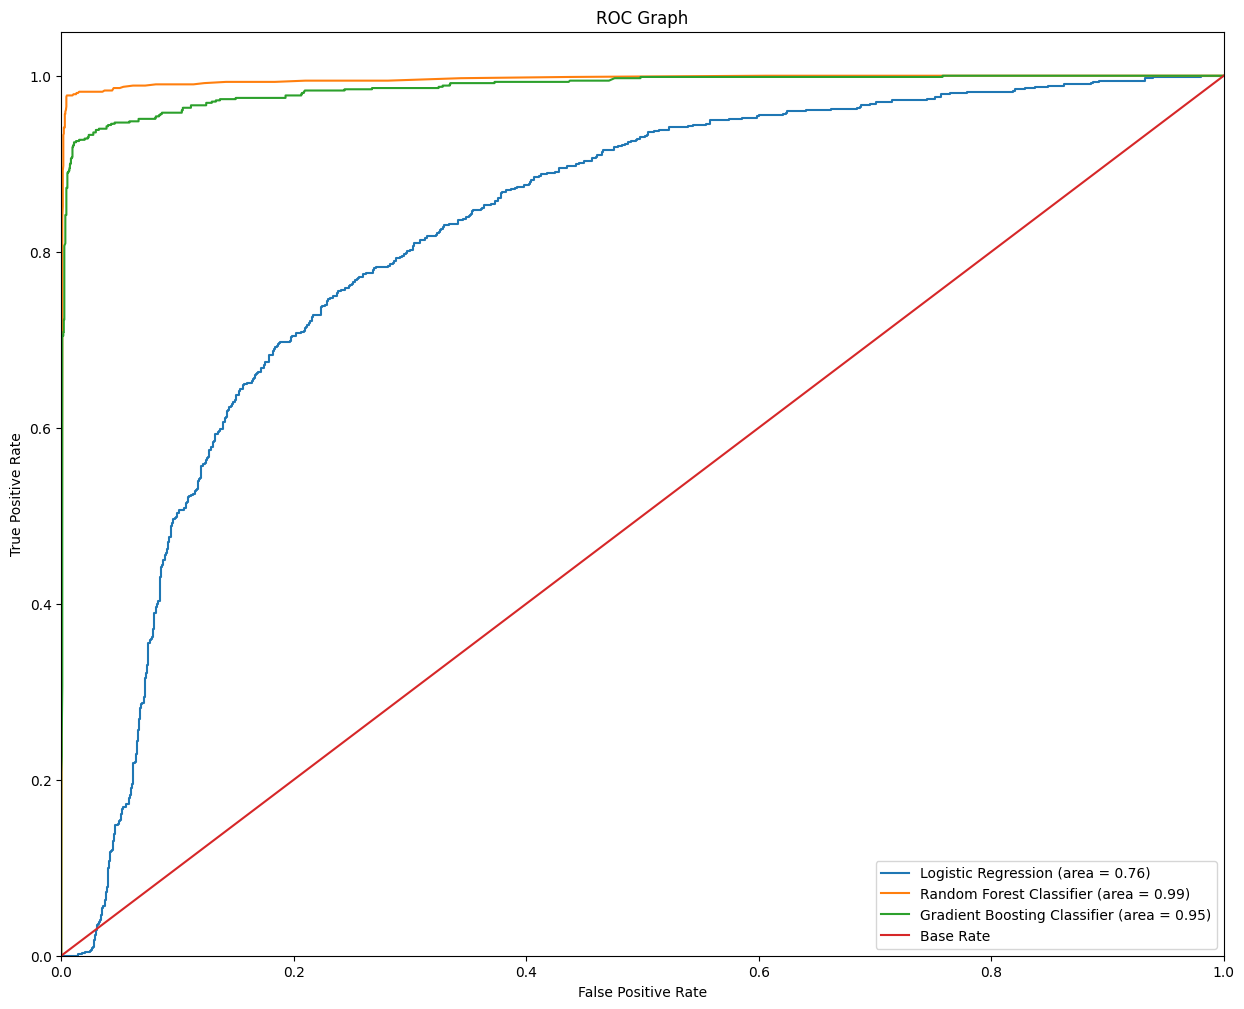

In [40]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(x_test)[:, 1])


plt.figure(figsize=(15, 12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest Classifier (area = %0.2f)" % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(
    gbc_fpr, gbc_tpr, label="Gradient Boosting Classifier (area = %0.2f)" % gbc_auc
)

# Plot Base Rate ROC
plt.plot([0, 1], [0, 1], label="Base Rate")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph")
plt.legend(loc="lower right")
plt.show()

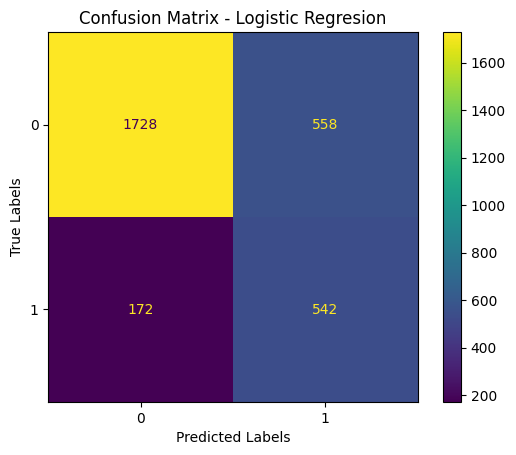

In [41]:
# Confusion Matrix for Logistic Regresion
# // TODO: Complete this section
y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Logistic Regresion")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

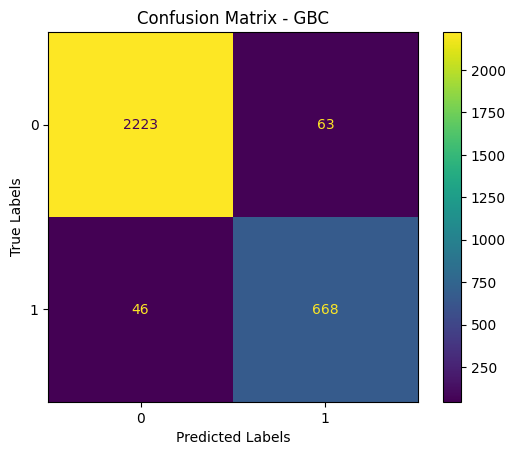

In [42]:
# Confusion Matrix for GBC
# // TODO: Complete this section
y_pred = gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix - GBC")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

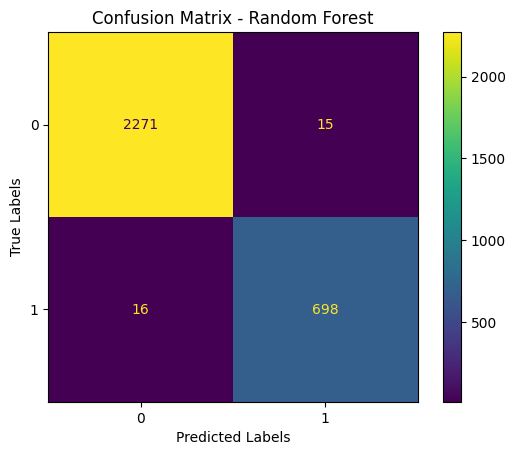

In [43]:
# Confusion Matrix for Random Forest
# // TODO: Complete this section
y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Random Forest")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

# Recall or Precision?

- What do precision and recall tell us? Which one should we optimize? Why?


Observations:

- Precision
  - Precision measures the accuracy of positive predictions.
  - High precision means fewer false positives.
- Recall
  - Recall measures the ability of the model to correctly identify all positive cases.
  - High recall means fewer false negatives.

I would optimize Recall.
That would focus on reducing the false negatives where we failed to predict that someone will leave and they actually do. This would be much more costly if they were to leave and we did not expect it. Compared to if we did think they were gonna leave, but they did not.


##### 7. Suggest various retention strategies on targeted employees.


### 7a. Using the best model, predict the probability of employee turnover in the test data


### Retention Plan


In [44]:
# Ranking turnover probability for employees
# // TODO: Predict the probability of employee turnover in the test data.

y_prob = rf.predict_proba(x_test)
y_prob

array([[1.  , 0.  ],
       [0.3 , 0.7 ],
       [0.96, 0.04],
       ...,
       [0.95, 0.05],
       [0.95, 0.05],
       [0.  , 1.  ]])

In [45]:
# Turnover (0 or 1)
# Prediction probabilities are in this order

rf.classes_

array([0, 1])

**Task:**

- Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
- Safe Zone (Green) (Score <= 20%)
- Low Risk Zone (Yellow) (20% < Score <= 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score => 90%).


In [46]:
# Probability of employee turnover in subset of test data.
list(rf.predict_proba(x_test)[175:185, 1])

[0.03, 0.0, 0.01, 1.0, 1.0, 0.15, 0.15, 0.99, 0.83, 0.07]

In [47]:
# // TODO: Complete this section
# Categorize the employees into Safe Zone

In [48]:
# // TODO: Complete this section
# Categorize the employees into Low Risk Zone

In [49]:
# // TODO: Complete this section
# Categorize the employees into Medium Risk Zone

In [50]:
# // TODO: Complete this section
# Categorize the employees into High Risk Zone

In [51]:
rf.predict_proba(x_test)[175:185, 1]

array([0.03, 0.  , 0.01, 1.  , 1.  , 0.15, 0.15, 0.99, 0.83, 0.07])

In [52]:
#
# * I combined all of the steps above where I split the different employees into zones into one for loop.

safe_zone = []
low_risk_zone = []
medium_risk_zone = []
high_risk_zone = []

for score in y_prob[:, 1]:
    # Safe Zone (Green) (Score <= 20%)
    if score <= 0.2:
        safe_zone.append(score)

    # Low Risk Zone (Yellow) (20% < Score <= 60%)
    elif score <= 0.6:
        low_risk_zone.append(score)

    # Medium Risk Zone (Orange) (60% < Score < 90%)
    elif score <= 0.9:
        medium_risk_zone.append(score)

    # High Risk Zone (Red) (Score => 90%)
    else:
        high_risk_zone.append(score)

print(len(safe_zone))
print(len(low_risk_zone))
print(len(medium_risk_zone))
print(len(high_risk_zone))

2193
100
62
645


### Suggest your thoughts on the retention strategies for each zone. What actions are required for the different zones?


Observations:

- Focus more on those with low or medium risks. Those with high risk are likely to leave whether we try to keep them or not. But those with low and medium risks, we are more likely to be able to sway their decision.
- We could offer promotions if their evaluation score is high enough to try to increase their satisfaction scores.
- We may need to decrease the workload on some we feel overworked.
- And overall start programs to increase satisfaction overall, even those who are not likely to leave or are in the safe zone.


## Conclusion


## What to Optimize

**Binary Classification**: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer or incentive to save them from leaving

Need for application: save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he or she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest-probability instances.

Solution 1:

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest-probability instances.

OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

---

Solution 2:

Develop learning programs for managers, then use analytics to gauge their performance and measure progress.

Be a good coach. Empower the team and do not micromanage.

Express interest in team members success.

Have a clear vision or strategy for the team.

Help the team with career development.


# Selection Bias

---

One thing to note about the dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when applying a machine learning algorithm to them.

Evaluation is heavily subjective and can vary tremendously depending on the evaluator. If the employee knows the evaluator, then he or she will probably have a higher score.
